la répartition hommes-femmes

enlever les doublons au sein d'une édition
group by sexe
group by édition
count par édition



sélectionner summer editions ou winter editions

calculer un ratio 

In [5]:
import pandas as pd

df = pd.read_csv("athlete_events.csv")


In [6]:
# compter le nombre de lignes 
print(len(df))

271116


In [7]:
# visualiser le tableau
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
# re-compter le nombre de lignes
# print(without_doublons.shape[0])

In [9]:
# enlever les doublons (si un athlète a participé 2 fois à une édition on compte une fois) 
without_doublons = df.drop_duplicates(subset=['Name','Year'])

# sélectionner les JO d'été
summer = without_doublons[without_doublons['Season'] == 'Summer']

# Group by Year and Sex, count the number of lines
gender_editions = (
    summer
    .groupby(['Sex','Year'])
    .size()
    .reset_index(name="Nb")
    )
    
# on pivote le dataframe
wide_table = (
    gender_editions
    .pivot(index='Year', columns='Sex', values='Nb')
    )

wide_table = wide_table.fillna(0)
wide_table = wide_table.reset_index()

wide_table.columns = ['Year', 'F', 'M']
wide_table['F'] = wide_table['F'].astype(int)
wide_table['M'] = wide_table['M'].astype(int)

wide_table = wide_table.rename(columns={'F':'nb_femmes', 'M':'nb_hommes'})

In [10]:
wide_table

,Year,nb_femmes,nb_hommes
0,1896,0,176
1,1900,23,1197
2,1904,6,644
3,1906,6,835
4,1908,44,1980
5,1912,53,2356
6,1920,78,2597
7,1924,156,3098
8,1928,312,2929
9,1932,201,1721


In [11]:
import matplotlib.pyplot as plt



# calculer le max pour l'axe x
max_limit = max(.max, wide_table["nb_femmes"]. )

barres horizontales pour les hommes
Hommes
-"nb_hommes"
color=purple


barres horizontales à droite pour les femmes


(nb_femmes)
color green


ax.title("Répartition hommes-femmes aux JO d'été")
ax.xlabels("Année")
ax.ylabels("Nombre de participants")


plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (3741559708.py, line 6)

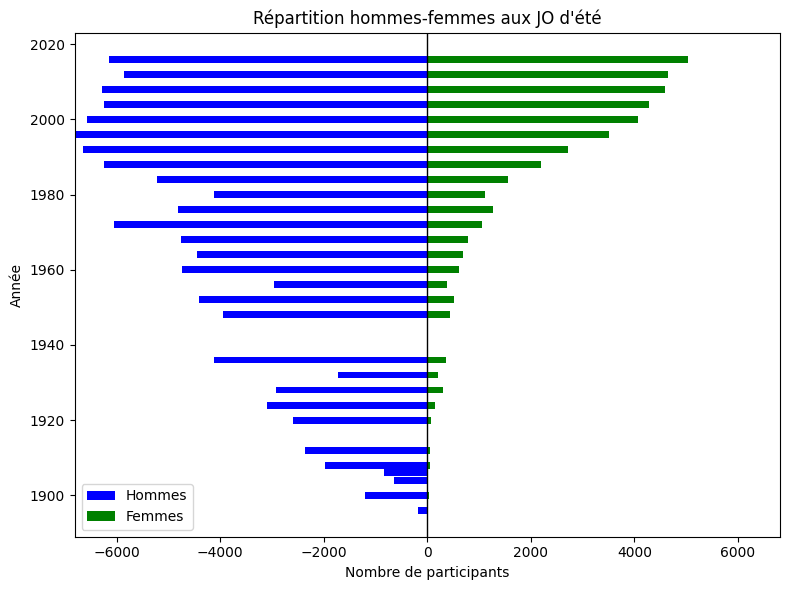

In [ ]:
def parite_hommes_femmes(df):
    """ affiche un graphique qui montre la répartition hommes-femmes par édition des JOs"""

# enlever les doublons (si un athlète a participé 2 fois à une édition on compte une fois) 
without_doublons = df.drop_duplicates(subset=['Name','Year'])

# sélectionner les JO d'été
summer = without_doublons[without_doublons['Season'] == 'Summer'] 

# Group by Year et Sex, compter le nombre de lignes
gender_editions = (
    summer
    .groupby(['Sex','Year'])
    .size()
    .reset_index(name="Nb")
    )
    
# on pivote le dataframe
wide_table = (
    gender_editions
    .pivot(index='Year', columns='Sex', values='Nb')
    )

wide_table = wide_table.fillna(0)
wide_table = wide_table.reset_index()

wide_table.columns = ['Year', 'F', 'M']
wide_table['F'] = wide_table['F'].astype(int)
wide_table['M'] = wide_table['M'].astype(int)

wide_table = wide_table.rename(columns={'F':'nb_femmes', 'M':'nb_hommes'})

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

# Barres pour les hommes (côté gauche)
ax.barh(
    wide_table['Year'],
    -wide_table['nb_hommes'], 
    color='blue',
    label='Hommes',
    height= 1.8,         # Épaisseur de la barre
    linewidth=2,        # Épaisseur du contour
)

# Barres pour les femmes (côté droit)
ax.barh(
    wide_table['Year'],
    wide_table['nb_femmes'],
    color='green',
    label='Femmes',
    height= 1.8,
    linewidth=2,
)

# Autres réglages (axvline, set_xlim, etc.)
max_val = max(wide_table['nb_hommes'].max(), wide_table["nb_femmes"].max())
ax.set_xlim(-max_val, max_val)
ax.axvline(0, color='black', linewidth=1)

ax.set_title("Répartition hommes-femmes aux JO d'été")
ax.set_xlabel("Nombre de participants")
ax.set_ylabel("Année")

ax.legend()
plt.tight_layout()
plt.show()